## **Pemahaman Cara Kerja K-Means Algorithm ( Data Mining A )**

### Jessica Laurentia T - 0706022310008

In [180]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import confusion_matrix

### **Small Dataset - Mess Personnel Dataset**

In [181]:
# Dataset
data = {
    'Food Item':   ['#1', '#2', '#3', '#4', '#5', '#6', '#7'],
    'Protein': [1.1, 8.2, 4.2, 1.5, 7.6, 2.0, 3.9],
    'Fat':     [60, 20, 35, 21, 15, 55, 39]
}

df = pd.DataFrame(data)
df


,Food Item,Protein,Fat
0,#1,1.1,60
1,#2,8.2,20
2,#3,4.2,35
3,#4,1.5,21
4,#5,7.6,15
5,#6,2.0,55
6,#7,3.9,39


In [182]:
df.shape

(7, 3)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Food Item  7 non-null      object 
 1   Protein    7 non-null      float64
 2   Fat        7 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 300.0+ bytes


In [184]:
df.describe()

,Protein,Fat
count,7.000000,7.00000
mean,4.071429,35.00000
std,2.865725,17.61628
min,1.100000,15.00000
25%,1.750000,20.50000
50%,3.900000,35.00000
75%,5.900000,47.00000
max,8.200000,60.00000


Dataset ini terdiri dari satu kolom identitas (Food Item) dan dua fitur numerik (Protein dan Fat) dengan total 7 entri. Hasil df.info() menunjukkan bahwa seluruh data lengkap tanpa nilai kosong dan tipe datanya sudah sesuai untuk digunakan dalam proses clustering K-Means.

In [185]:
# Mengecek data yang kosong
df.isnull().sum()

,0
Food Item,0
Protein,0
Fat,0


#### **Data Scaling**

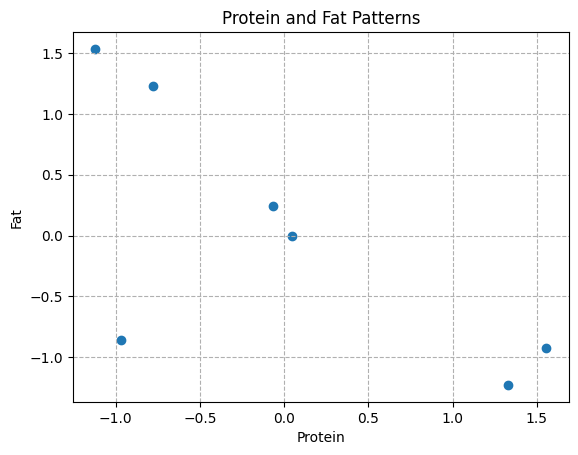

In [186]:
# scale dataset with standard scaler

X = df[['Protein', 'Fat']]

sc = StandardScaler()
scaled = sc.fit_transform(X)

df_sc_scaled = pd.DataFrame(scaled, columns=['Protein', 'Fat'])
df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Protein"], df_sc_scaled["Fat"])
plt.xlabel("Protein")
plt.ylabel("Fat")
plt.grid(axis='both', linestyle='--')
plt.title("Protein and Fat Patterns")
plt.show()

#### **K-Means Clustering**

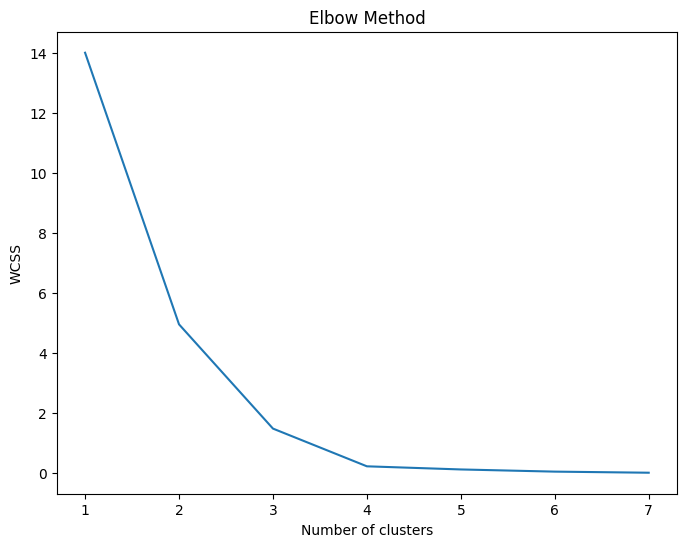

In [187]:
wcss = []
for i in range(1, 8): # Clusters 1-7
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [188]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 8),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   1  14.000000
1                   2   4.945770
2                   3   1.471002
3                   4   0.213559
4                   5   0.109032
5                   6   0.036468
6                   7   0.000000


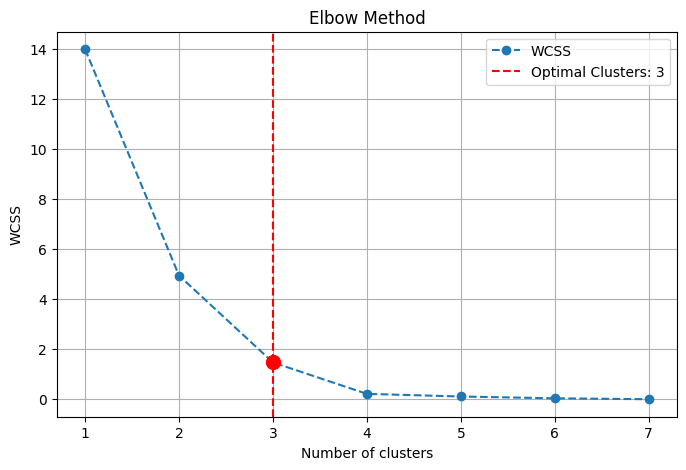

The optimal number of clusters is: 3


In [189]:
# Example WCSS values and cluster numbers
clusters = range(1, 8)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [190]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df

,Food Item,Protein,Fat,KMeans_Cluster
0,#1,1.1,60,2
1,#2,8.2,20,1
2,#3,4.2,35,0
3,#4,1.5,21,0
4,#5,7.6,15,1
5,#6,2.0,55,2
6,#7,3.9,39,0


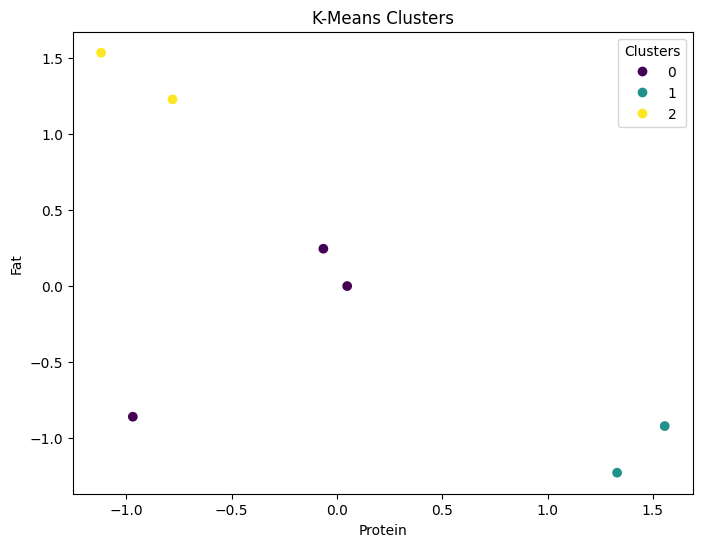

In [191]:
# K-Means clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_sc_scaled['Protein'], df_sc_scaled['Fat'], c=df['KMeans_Cluster'], cmap='viridis')
plt.xlabel('Protein')
plt.ylabel('Fat')
plt.title('K-Means Clusters')
legend = plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

#### **Large Dataset - Iris Dataset**

In [192]:
# Load Iris dataset
iris = datasets.load_iris()

dfIris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Preview dataset
dfIris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [193]:
# add data target to the df
dfIris['Y'] = iris.target
display(dfIris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [194]:
dfIris.shape

(150, 5)

In [195]:
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Y                  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


The unique values in the 'Y' column represent the different species of Iris flowers:
- 0: Iris-setosa
- 1: Iris-versicolor
- 2: Iris-virginica

In [196]:
dfIris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Dataset Iris terdiri dari empat fitur numerik dan satu target (Y) dengan total 150 entri. Seluruh data lengkap tanpa missing value dan memiliki tipe numerik yang sesuai untuk proses clustering.

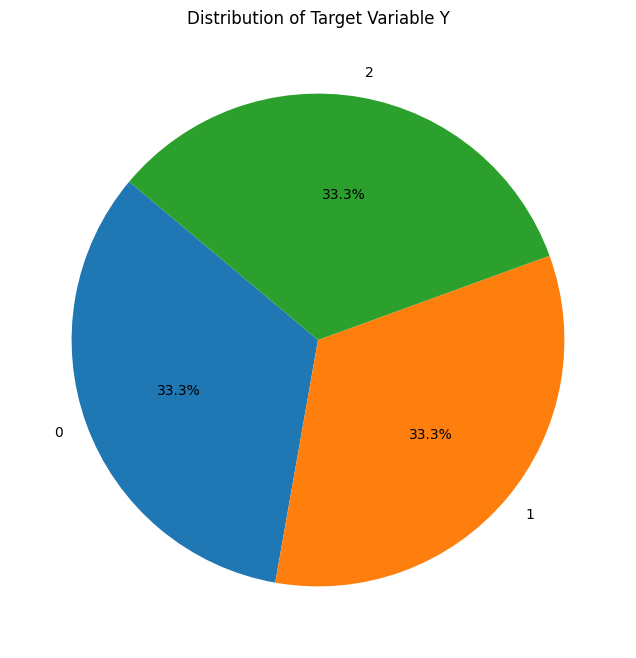

In [197]:
# Get the counts of each unique value in the 'Y' column
y_counts = dfIris['Y'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable Y')
plt.show()

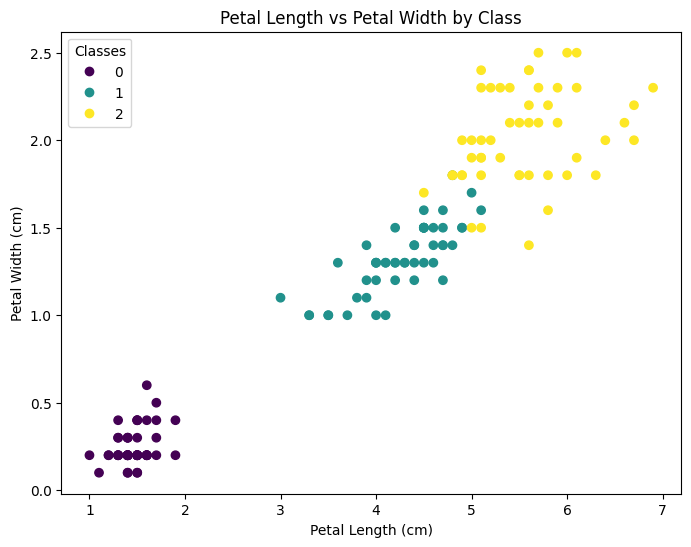

In [198]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(dfIris['petal length (cm)'], dfIris['petal width (cm)'], c=dfIris['Y'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Class')
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

In [199]:
dfIris.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
Y,0


In [200]:
# Check for duplicate rows in dataset
dfIris[dfIris.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [201]:
# Keep only the first occurrence of each duplicate row and remove the rest
dfIris = dfIris.drop_duplicates(keep='first')

In [202]:
# Drop unused columns: 'sepal width (cm), so there will be only 3 features'
dfIris.drop(['sepal width (cm)'], axis=1, inplace=True)

In [203]:
# View the summary of dataset again
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   petal length (cm)  149 non-null    float64
 2   petal width (cm)   149 non-null    float64
 3   Y                  149 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 5.8 KB


#### **Data Scaling**

In [204]:
# scale dataset with standard scaler
X = dfIris[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]

# scaling
sc = StandardScaler()
scaled = sc.fit_transform(X)

# masukkan kembali ke dataframe baru
dfIris_scaled = pd.DataFrame(
    scaled,
    columns=['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
)

dfIris_scaled.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,-0.898033,-1.333255,-1.308624
1,-1.139562,-1.333255,-1.308624
2,-1.381091,-1.390014,-1.308624
3,-1.501855,-1.276496,-1.308624
4,-1.018798,-1.333255,-1.308624


In [205]:
kmeans_iris = KMeans(n_clusters=3, random_state=0)
clusters_iris = kmeans_iris.fit_predict(X)

In [206]:
import plotly.express as px

fig_3d = px.scatter_3d(
    dfIris_scaled.assign(cluster=clusters_iris),
    x='sepal length (cm)',
    y='petal length (cm)',
    z='petal width (cm)',
    color='cluster',
    color_continuous_scale='viridis',
    title='3D Scatter (Scaled Data): Sepal vs Petal Features',
    labels={
        'sepal length (cm)': 'Sepal Length (scaled)',
        'petal length (cm)': 'Petal Length (scaled)',
        'petal width (cm)': 'Petal Width (scaled)'
    }
)

fig_3d.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig_3d.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig_3d.show()


#### **K-Means Clustering**

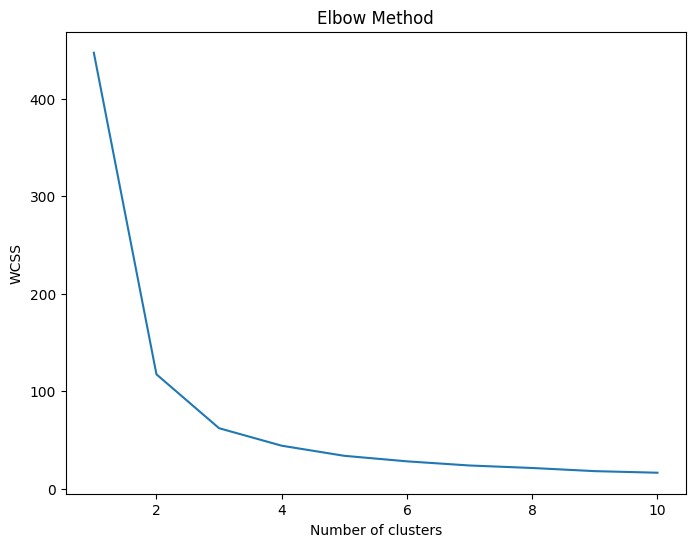

In [207]:
wcss = []
for i in range(1, 11): # Clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dfIris_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [208]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  447.000000
1                   2  117.433525
2                   3   62.208903
3                   4   44.291641
4                   5   33.935848
5                   6   28.273778
6                   7   24.023682
7                   8   21.462203
8                   9   18.231579
9                  10   16.613812


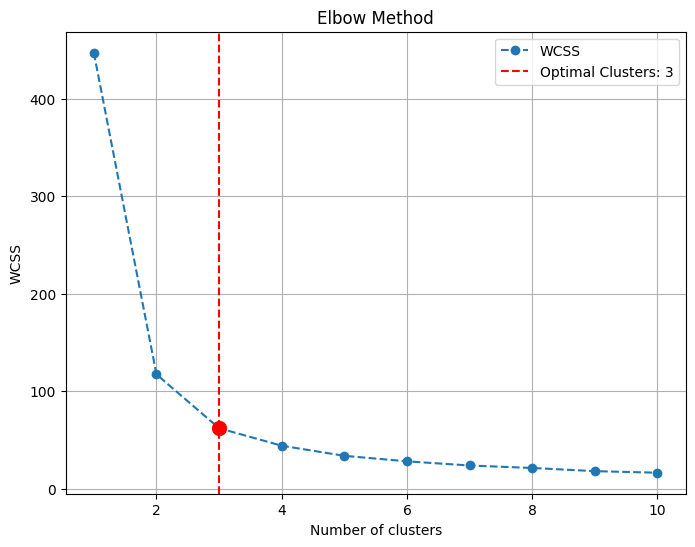

The optimal number of clusters is: 3


In [209]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [210]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(dfIris_scaled)

# Add the cluster labels to the DataFrame
dfIris['K-Means Cluster'] = clusters

# Show the df
dfIris.head()

,sepal length (cm),petal length (cm),petal width (cm),Y,K-Means Cluster
0,5.1,1.4,0.2,0,2
1,4.9,1.4,0.2,0,2
2,4.7,1.3,0.2,0,2
3,4.6,1.5,0.2,0,2
4,5.0,1.4,0.2,0,2


In [211]:
cm = confusion_matrix(dfIris['Y'], kmeans.labels_)
dfIris_cm = pd.DataFrame(cm,
                     index=['Iris-setosa', 'Versicolor', 'Virginica'],
                     columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])
dfIris_cm

,Cluster 0,Cluster 1,Cluster 2
Iris-setosa,0,0,50
Versicolor,45,5,0
Virginica,11,38,0


In [212]:
# True Classes
fig_true = px.scatter_3d(
    dfIris_scaled.assign(Class=dfIris['Y']),
    x='sepal length (cm)',
    y='petal length (cm)',
    z='petal width (cm)',
    color='Class',
    color_continuous_scale='viridis',
    title='3D Scatter – True Iris Classes (Original Labels)',
    labels={
        'sepal length (cm)': 'Sepal Length (scaled)',
        'petal length (cm)': 'Petal Length (scaled)',
        'petal width (cm)': 'Petal Width (scaled)'
    }
)

fig_true.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig_true.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig_true.show()

# K-Means Clusters (Predicted Clusters)
fig_cluster = px.scatter_3d(
    dfIris_scaled.assign(cluster=clusters_iris),
    x='sepal length (cm)',
    y='petal length (cm)',
    z='petal width (cm)',
    color='cluster',
    color_continuous_scale='viridis',
    title='3D Scatter – K-Means Clusters (Predicted Groups)',
    labels={
        'sepal length (cm)': 'Sepal Length (scaled)',
        'petal length (cm)': 'Petal Length (scaled)',
        'petal width (cm)': 'Petal Width (scaled)'
    }
)

fig_cluster.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig_cluster.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig_cluster.show()